In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data
df = pd.read_csv('USW00094728.csv').drop(columns=['Unnamed: 0'])

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for years 1970-2020
df = df[(df['Date'].dt.year > 1969) & (df['Date'].dt.year < 2021)]

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Resample by month and compute mean
df_monthly = df.resample('M').mean()

# Reset index properly
df_monthly = df_monthly.reset_index()  # Keep 'Date' as a datetime object

#df_monthly["Date"] = df_monthly["Date"].dt.strftime('%Y-%m') ##uncomment this to format it in yr/m but it won't graoh correctly afterward

print(df_monthly.head())
print(df_monthly.tail())

        Date       tmax       tmin      prcp
0 1970-01-31  31.516129  18.709677  0.021290
1 1970-02-28  40.678571  25.285714  0.161429
2 1970-03-31  45.322581  32.000000  0.134839
3 1970-04-30  60.766667  43.400000  0.116000
4 1970-05-31  73.419355  54.645161  0.107742
          Date       tmax       tmin      prcp
607 2020-08-31  83.774194  69.974194  0.162258
608 2020-09-30  75.483333  62.036667  0.131333
609 2020-10-31  63.903226  51.861290  0.162903
610 2020-11-30  59.826667  46.076667  0.133000
611 2020-12-31  45.083871  33.419355  0.148710


/var/folders/bp/hcxzvqx903z9dhp_nkm85d080000gn/T/ipykernel_28843/771887545.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


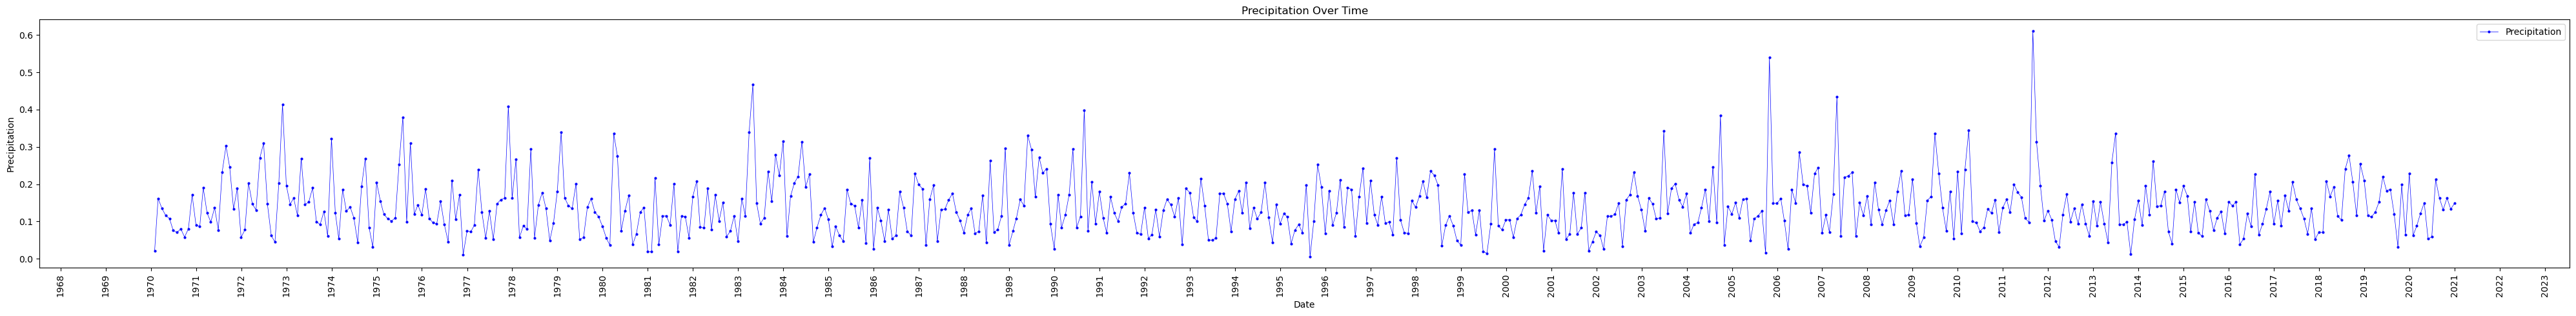

In [78]:
plt.figure(figsize=(40, 5))
plt.plot(df_monthly["Date"], df_monthly["prcp"], marker='o', markersize=2, linestyle='-', linewidth=0.5, color='b', label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Over Time")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Yearly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format as 'YYYY'

plt.xticks(rotation=90)  
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig('precip_by_yr.png')
plt.show()

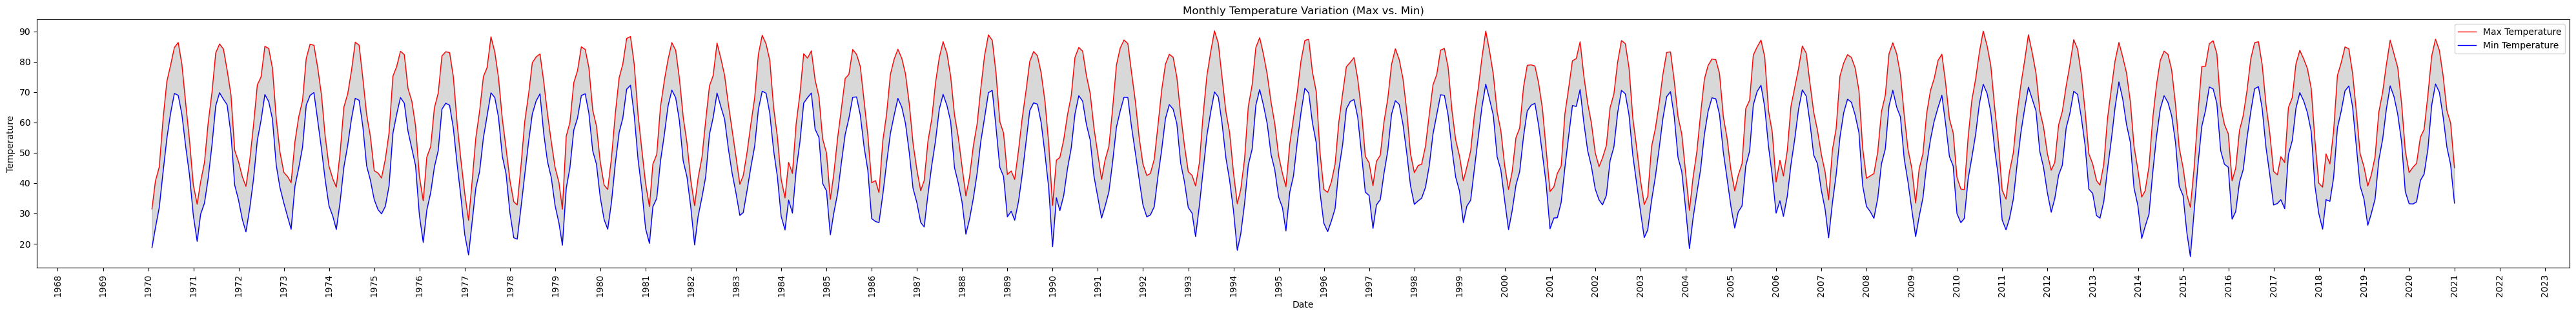

In [84]:
plt.figure(figsize=(40, 5))
plt.plot(df_monthly["Date"], df_monthly["tmax"], linestyle='-', linewidth=1, color='r', label="Max Temperature")
plt.plot(df_monthly["Date"], df_monthly["tmin"], linestyle='-', linewidth=1, color='b', label="Min Temperature")
plt.fill_between(df_monthly["Date"], df_monthly["tmax"], df_monthly["tmin"], color='gray', alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Monthly Temperature Variation (Max vs. Min)")

# Set x-axis to show only yearly labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Yearly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format as 'YYYY'

plt.xticks(rotation=90)  # Rotate labels
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig('temp_r_by_yr.png')
plt.show()
